# WEEK - 9 (Principal Component Analysis)

### 1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].Implement principal component analysis. Use this to obtain the feature in transformed 2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

#### Step -1 : Standardization

In [3]:
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev

#### step - 2 : Compute the covariance matrix

In [4]:
cov_matrix = np.cov(standardized_data, rowvar=False)

#### Step - 3 : Perform Eigen decomposition

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#### Step - 4 : Sort the Eigen values according to the decreasing order of their magnitude

In [6]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#### Step - 5 : Select the ‘k’ Eigen vectors with largest Eigen values (k -> reduced dimension)

In [7]:
k = 2  # Number of principal components to select
principal_components = sorted_eigenvectors[:, :k]

#### Step - 6 : Project the data points onto the principal components to obtain the new feature vector

In [8]:
transformed_data = np.dot(standardized_data, principal_components)

#### Plotting

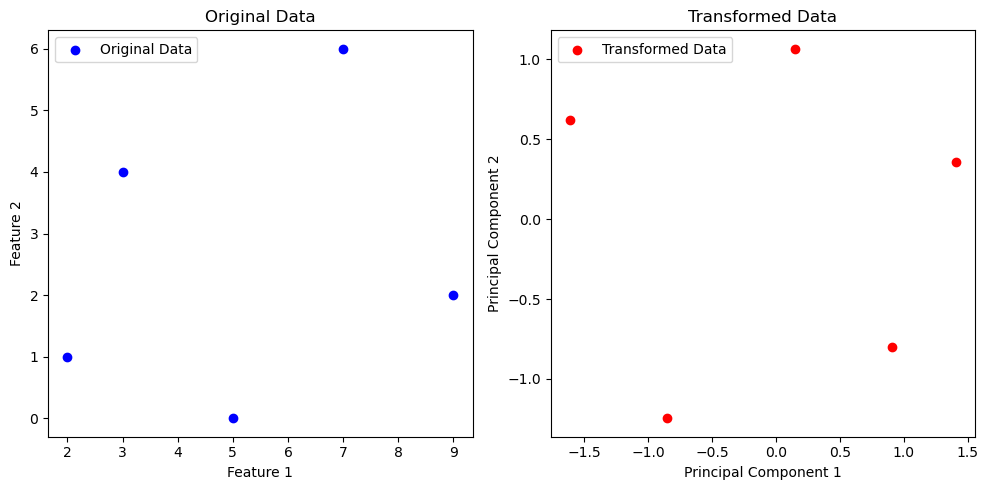

In [9]:
plt.figure(figsize=(10, 5))

# Original Data Plot
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# Transformed Data Plot
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='r', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')
plt.legend()

plt.tight_layout()
plt.show()


### 2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
data = iris.data
target = iris.target

#### Step 1: Standardize data

In [12]:
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev

#### Step 2: Compute Covariance matrix

In [13]:
cov_matrix = np.cov(standardized_data, rowvar=False)

#### Step 3: Perform Eigen decomposition

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#### Step 4: Sort the Eigen values

In [15]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


#### Step 5: Select the ‘k’ Eigen vectors

In [16]:
k = 2
principal_components = sorted_eigenvectors[:, :k]

#### Step 6: Project the data points

In [17]:
transformed_data = np.dot(standardized_data, principal_components)


#### Plotting

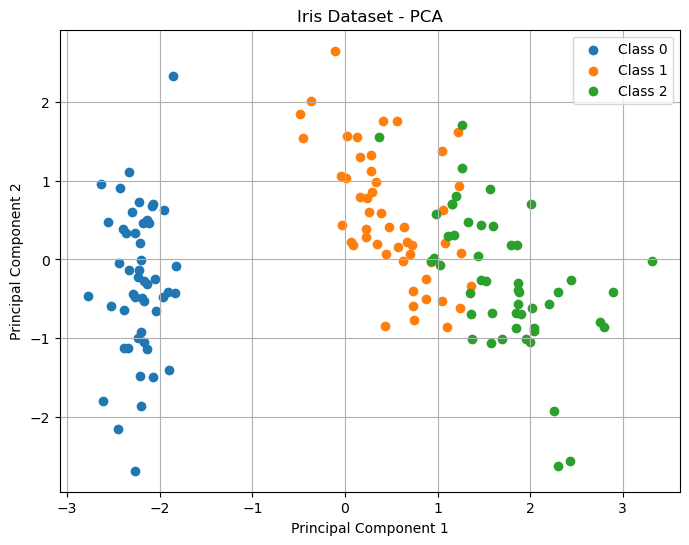

In [18]:
plt.figure(figsize=(8, 6))

for i in range(3):  
    plt.scatter(transformed_data[target == i, 0], transformed_data[target == i, 1], label=f'Class {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset - PCA')
plt.legend()
plt.grid(True)
plt.show()